参考资料：
+ https://blog.csdn.net/shebao3333/article/details/78808066 - 好
+ https://blog.csdn.net/xdzhangzhenhao/article/details/81147838
+ 

In [171]:
import os
import numpy as np 
import pandas as pd 
from cv2 import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt 

ROOT_DIR = os.getcwd()
IMG_DTR = os.path.join(ROOT_DIR, 'images')

In [172]:
target_imgs = [ os.path.join(IMG_DTR, img_name) for img_name in os.listdir(IMG_DTR)] 
target_imgs.sort() # 升序，注意不能 listA = listA.sort(), sort没有返回值
target_imgs

['/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码0.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码1.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码2.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码3.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码4.jpg']

In [173]:
# 为了方便图片直接显示在jupyter中，cv的imshow不能直接在jupyter中显示
# 为了用matplotlib显示（ 不能用plt.show()，要用plt.imshow() ）
# 由于CV的通道是BGR顺序，而matpotlib是 RGB顺序，这里要做通道转换
# 方法一
def bgr2rgb_v2(img):
    # 用cv自带的分割和合并函数
    B,G,R = cv.split(img)
    return cv.merge()
# 方法二
def bgr2rgb(img):
    # 直接用python切片特性，[start: end: step], 这里start end为空，则默认遍历全部，step为-1则倒序遍历
    return img[:, :, ::-1]

In [174]:
target = target_imgs[4]
img = cv.imread(target, cv.IMREAD_UNCHANGED) # 以原始格式读入图片
img.shape 

(117, 220, 3)

这里读的图是 验证码.jpg 其尺寸为 117x220 （长x宽），色彩空间为 RGB    
看img矩阵的shape为 (117,220,3)，其中3为像素模式，cv顺序为BGR


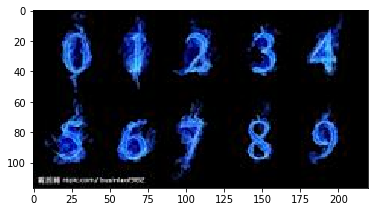

In [175]:
plt.imshow(img) # 未将通道改成RGB

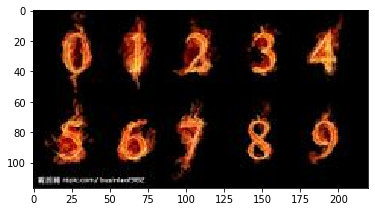

In [176]:
plt.imshow(bgr2rgb(img)) # 改成RGB模式

In [177]:
img_gray = cv.imread(target, cv.IMREAD_GRAYSCALE) # 以灰度图格式读入
img_gray.shape # 灰度图了，就没有第三个维度了

(117, 220)

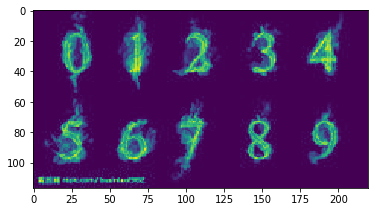

In [178]:
img_gray = cv.imread(target, cv.IMREAD_GRAYSCALE) # 以灰度图格式读入
plt.imshow(img_gray) # 直接show不会是灰度图展示

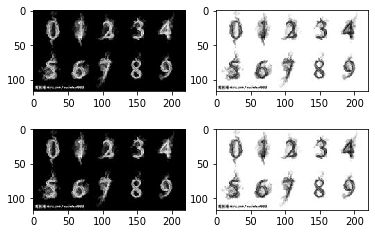

In [179]:
# 绘画灰度图的四种方法
i = 1
for cmap in [plt.cm.gray, plt.cm.gray_r, 'gray', 'gray_r']: # gray_r中的r表示reverse，代表逆转, 黑白颠倒
    plt.subplot(2,2,i); plt.imshow(img_gray, cmap=cmap)
    i += 1

[Python+OpenCV图像处理之图像二值化](https://www.cnblogs.com/qianxia/p/11093722.html)

In [180]:
def genNeedImg(img_path, img_type='binary', binary_therhold=127, 
               binary_revese=False, size=None, save=False, path='./'):
    '''
    用于生成指定大小的灰度图或二值图, img_path为图像路径
    type为标志转换类型，默认为binary，可选的值为binary或gray
    binary_therhold为二值图划分阈值，默认127（即大于127的像素设置为255，否则置0）
    binary_revese默认为False，True时黑白颠倒（即大于127的像素设置为0，否则置255）
    size为tuple类型，用于指定生成图像的尺寸, 如：(512,512)，默认为None表示输出原图像尺寸
    save为保存标志，默认为False，为true时将生成的图保存到path(默认为当前文件夹)
    '''
    img_raw = cv.imread(img_path)
    if size != None: # 调整图像尺寸
        img_raw= cv.resize(img_raw,size)
    img_gray = cv.cvtColor(img_raw,cv.COLOR_RGB2GRAY) # 转换颜色空间为灰度
    img_name = img_path[9:].split('.')[0] # 获取图像原始名称
    if img_type == 'gray': # 生成灰度图
        if save:
            cv.imwrite(os.path.join(path,'{}_gray.bmp'.format(img_name)),img_gray)
        else:
            return img_gray
        print('Gray image generated!')
    else: # 生成二值图
        if binary_revese:
            ret, img_binary = cv.threshold(img_gray,binary_therhold,255,cv.THRESH_BINARY_INV) #反二进制阈值化
        else:
            ret, img_binary = cv.threshold(img_gray,binary_therhold,255,cv.THRESH_BINARY)# 二进制阈值化
        if save:
            cv.imwrite(os.path.join(path,'{}_binary.bmp'.format(img_name)),img_binary)
        else:
            return img_binary
        print('Binary image generated!')
        print('threshold:{}'.format(ret)) # 输出转换阈值

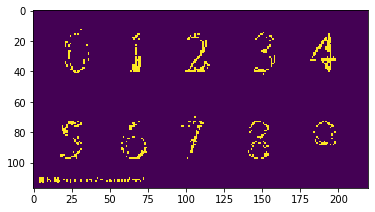

In [181]:
img_binary = genNeedImg(target, img_type='binary')
plt.imshow(img_binary) # 还是老毛病，matplotlab直接imshow 灰度图/二值图 会有色彩

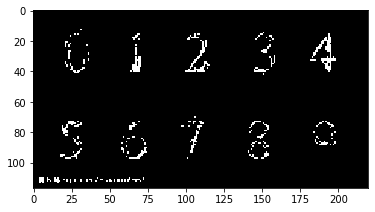

In [182]:
plt.imshow(img_binary, cmap='gray') 

上面的二值化效果不太好，考虑反转黑白进行二值化，或者可以调整二值化阈值

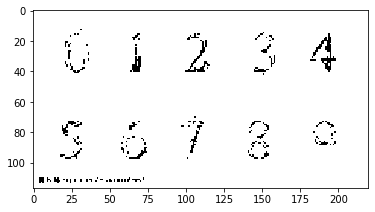

In [183]:
# 反转看看
img_binary = genNeedImg(target, img_type='binary', binary_revese=True)
plt.imshow(img_binary, cmap='gray') 

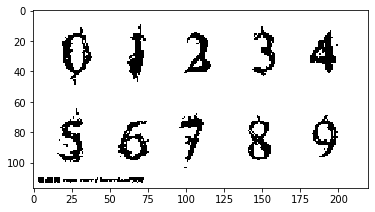

In [188]:
# 反转并调整阈值
img_binary = genNeedImg(target, img_type='binary', binary_revese=True, binary_therhold=78)
plt.imshow(img_binary, cmap='gray') # 还是老毛病，matplotlab直接imshow 灰度图/二值图 会有色彩

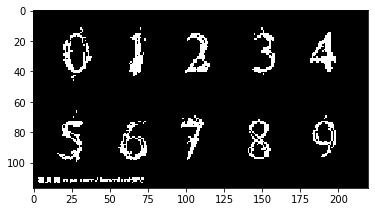

In [192]:
# 调整阈值，不反转
img_binary = genNeedImg(target, img_type='binary', binary_therhold=98)
plt.imshow(img_binary, cmap='gray') # 还是老毛病，matplotlab直接imshow 灰度图/二值图 会有色彩